In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
import distribution_modules as dm
import density_estimation_modules as dem

import importlib
importlib.reload(dm)
importlib.reload(dem)

<module 'density_estimation_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\density_estimation_modules.py'>

In [21]:
sample_size = 100
nr_sample = 100
nr_moments = 3

### Bounded distributions

In [4]:
bounded_dists = dm.get_bounded_distribution()
#dm.plot_histograms_of_samples(bounded_dists, sample_size=sample_size, nr_sample=nr_sample)

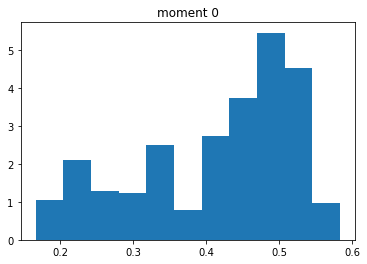

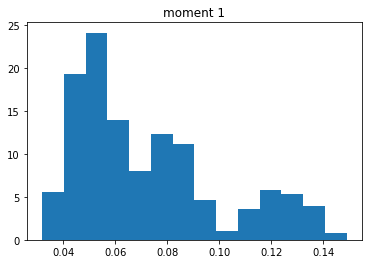

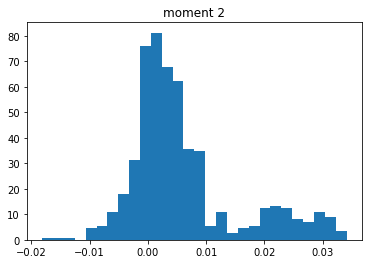

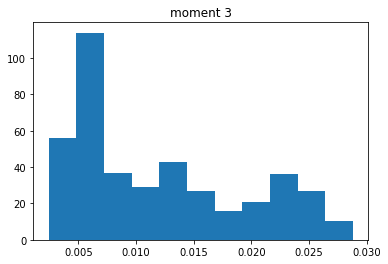

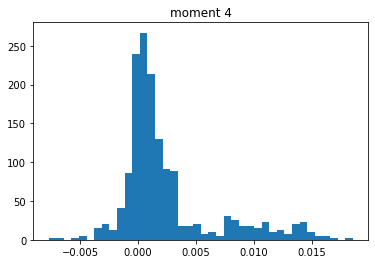

In [14]:
moments_df = dem.get_moments_df(bounded_dists, nr_moments=nr_moments, sample_size=sample_size, nr_sample=nr_sample)
dem.get_histogram_of_moments(moments_df)

### Longtail distributions

In [22]:
longtail_dists = dm.get_longtail_distribution()
# dm.plot_histograms_of_samples(longtail_dists, s_size=100, nr_sample=10)

MemoryError: Unable to allocate 10.5 GiB for an array with shape (1406332869,) and data type float64

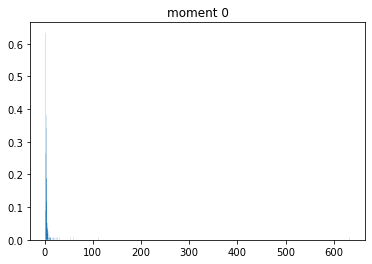

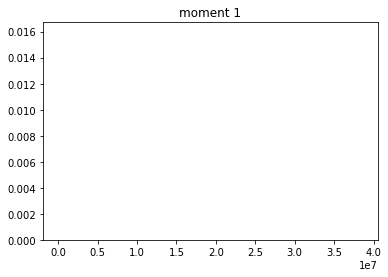

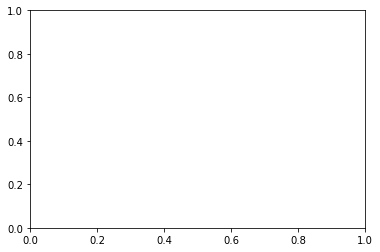

In [23]:
moments_df = dem.get_moments_df(longtail_dists, nr_moments=nr_moments, sample_size=sample_size, nr_sample=nr_sample)
dem.get_histogram_of_moments(moments_df)

In [24]:
moments_df

,m1,m2,m3,dist
0,2.694987,43.363212,1536.514722,cauchy
1,1.678578,9.860843,205.852969,cauchy
2,3.143346,46.276931,1788.363833,cauchy
3,3.546117,194.855215,22774.533517,cauchy
4,2.835260,24.799479,498.591383,cauchy
...,...,...,...,...
395,3.209807,61.225568,2358.746200,weibull_min_0.4
396,1.712346,11.546278,140.596564,weibull_min_0.4
397,4.177474,130.014581,8254.158665,weibull_min_0.4
398,4.312185,253.491372,26310.453844,weibull_min_0.4


In [ ]:
longtail_dists = scripts.get_longtail_distribution()
#scripts.plot_histograms_of_samples(bounded_dists, s_size=100, nr_sample=10)
moments_df = scripts.get_moments_df(longtail_dists, nr_moments=3, s_size=100, nr_sample=21)
X, y, X_train, X_test, y_train, y_test = prepare_data(moments_df, 0.2)
svm_model(X, y, X_train, X_test, y_train, y_test, 5)

In [ ]:
longtail_dists = scripts.get_longtail_distribution()
scripts.plot_histograms_of_samples(longtail_dists, s_size=100, nr_sample=10)
#moments_df = scripts.get_moments_df(longtail_dists, nr_moments=3, s_size=100, nr_sample=21)

In [171]:
for i in range(10,21):
    moments_df = scripts.get_moments_df(bounded_dists, nr_moments=5, s_size=100, nr_sample=i)
    X, y, X_train, X_test, y_train, y_test = prepare_data(moments_df, 0.2)
    error = svm_model(X, y, X_train, X_test, y_train, y_test, 5)
    #print(moments_df)
    print(error)

(0.9166666666666667, array([1.        , 1.        , 0.75      , 0.83333333, 1.        ]))
(0.6527472527472528, array([0.57142857, 0.69230769, 0.53846154, 0.69230769, 0.76923077]))
(0.4885714285714286, array([0.4       , 0.4       , 0.5       , 0.57142857, 0.57142857]))
(0.3633333333333333, array([0.25      , 0.25      , 0.25      , 0.66666667, 0.4       ]))
(0.44191176470588245, array([0.29411765, 0.47058824, 0.58823529, 0.29411765, 0.5625    ]))
(0.9333333333333333, array([1.        , 0.88888889, 0.83333333, 1.        , 0.94444444]))
(0.6884210526315788, array([0.6       , 0.68421053, 0.68421053, 0.78947368, 0.68421053]))
(0.5214285714285715, array([0.42857143, 0.42857143, 0.6       , 0.65      , 0.5       ]))
(0.4207792207792208, array([0.27272727, 0.27272727, 0.27272727, 0.76190476, 0.52380952]))
(0.6142292490118577, array([0.43478261, 0.47826087, 0.95652174, 0.56521739, 0.63636364]))
(0.9416666666666667, array([1.        , 0.83333333, 1.        , 0.91666667, 0.95833333]))


In [103]:
moments_df = modules.get_moments_df(bounded_dists, nr_moments=4, s_size=100, nr_sample=21)
X, y, X_train, X_test, y_train, y_test = prepare_data(moments_df, 0.2)

In [105]:
X_test.shape

(26, 5)

{'C': 0.5, 'gamma': 1, 'kernel': 'rbf'}


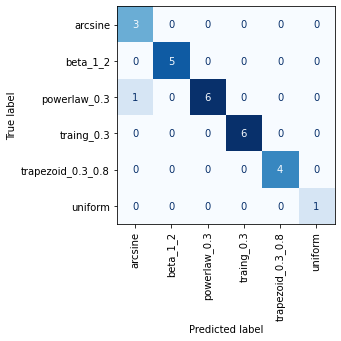

In [106]:
# find the best parameters
param_grid = [
    {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
         'gamma':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 
         'kernel':['rbf']},
]

optimal_params = GridSearchCV(SVC(), param_grid,cv=5, verbose=0)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

c = optimal_params.best_params_['C']
g = optimal_params.best_params_['gamma']

clf_svm = SVC(random_state=10, C=c, gamma=g)
clf_svm.fit(X_train, y_train)

y_pred = clf_svm.predict(X_test)
c_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(c_matrix, display_labels=clf_svm.classes_)
disp.plot(cmap=plt.cm.Blues, colorbar=False, xticks_rotation='vertical')
plt.show()

In [111]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cv

ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None)

In [120]:
scores = cross_val_score(clf_svm, X, y, cv=5)
scores

array([0.61538462, 0.64      , 0.8       , 0.8       , 0.76      ])

In [102]:
scores.std()

0.062360956446232345

In [194]:
optimal_params.cv_results_

{'mean_fit_time': array([0.00099764, 0.00162692, 0.00100398, 0.00100017, 0.00120244,
        0.00120053, 0.00161204, 0.00100617, 0.00139432, 0.00159335,
        0.00100083, 0.00120831, 0.0010004 , 0.00119801, 0.00119634,
        0.00120177, 0.00179157, 0.00101423, 0.00138779, 0.00139985,
        0.00080504, 0.00100007, 0.0012156 , 0.00100007, 0.00100012,
        0.00099888, 0.00110083, 0.00163822, 0.00099735, 0.00162005,
        0.00101976, 0.00099387, 0.00140595, 0.00120349, 0.00102224,
        0.00140862, 0.0010016 , 0.00102439, 0.00160151, 0.00099969,
        0.00080099, 0.00082097, 0.00084815, 0.00098944, 0.00120058,
        0.00101795, 0.00123153, 0.00103517, 0.00099959, 0.00160031,
        0.00141187, 0.00101056, 0.00121121, 0.00119591, 0.00100813,
        0.00120282, 0.00139999, 0.00203614, 0.0009963 , 0.00160017,
        0.00100574, 0.00101075, 0.00079994, 0.00100012, 0.00147033,
        0.00119448, 0.00100694, 0.00132036, 0.00119238, 0.00102272,
        0.00100026, 0.0012001 ,

In [52]:
def prepare_data(df, test_size):
    X = df.drop('dist', axis=1)
    y = df['dist']
    
    # Scaling data
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)

    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = test_size, random_state=10)
    return X, y, X_train, X_test, y_train, y_test

In [9]:
def svm_model(X, y, X_train, X_test, y_train, y_test, cv):
    param_grid = [
        {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
         'gamma':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 
         'kernel':['rbf']},
    ]

    optimal_params = GridSearchCV(SVC(), param_grid,cv=5, verbose=0)
    optimal_params.fit(X_train, y_train)

    clf_svm = SVC(random_state=10, C=optimal_params.best_params_['C'], gamma=optimal_params.best_params_['gamma'])
    clf_svm.fit(X_train, y_train)

    y_pred = clf_svm.predict(X_test)
    scores = cross_val_score(clf_svm, X, y, cv=cv)
    accuracy = scores.mean()
    return accuracy,scores